# Ecommerce Product Categorization

### In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. Develop a text classification model that categorizes products with maximum accuracy based on description of the product.

# Objectives: 

<!-- 1. Data Exploration and Preparation:
2. Descriptive Analysis & Visualization:
3. Feature Engineering/Text to Features:
4. Predictive Modeling:
5. Fine Tuning:
6. Enhance Categorization Accuracy: -->

<!-- ### Data Import and Preprocessing
# Exploratory Data Analysis (EDA)
# Feature Engineering/Text to feature
# Machine Learning Model Building
# Model Evaluation:
# Imbalanced Class Handling
# Cross-Validation
# Hyperparameter Tuning
# Predictions -->

In [142]:
# Data Import and Preprocessing
# Exploratory Data Analysis (EDA)
# Feature Engineering/Text to feature
# Machine Learning Model Building
# Model Evaluation:
# Imbalanced Class Handling
# Cross-Validation
# Hyperparameter Tuning
# Predictions 

### Data Import and Preprocessing

In [143]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [144]:
ecom_data = pd.read_csv(r"C:\Upgrad\PYTHON week 6, 7 8\train_product_data.csv")
ecom_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [145]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [146]:
ecom_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [147]:
ecom_data.shape

(14999, 15)

## Feature Transformation

#### Missing Value Treatment

In [148]:
ecom_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [149]:
ecom_data.fillna({'brand': 'Not Mentioned', 'retail_price' : 0, 'discounted_price':0,
                  'image':'Absent','description':'Not Mentioned',
                  'product_specifications':'Not Given'},inplace=True)

In [150]:
ecom_data.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

## Identifying Outliers & Treatment of Outliers

<Axes: >

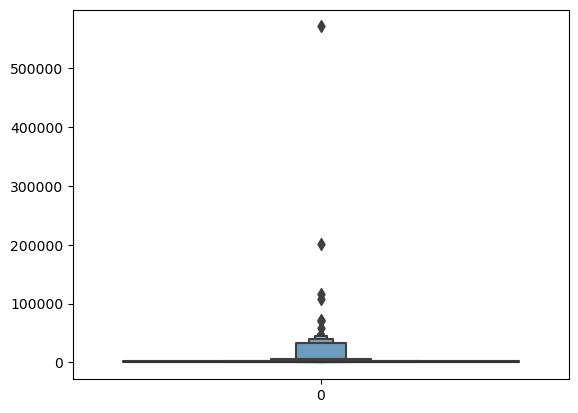

In [151]:
sns.boxenplot(ecom_data['retail_price'])

In [152]:
outlier=ecom_data.select_dtypes(exclude=['object','bool']).columns
Q1=ecom_data[outlier].quantile(0.25)
Q3=ecom_data[outlier].quantile(0.75)
IQR=Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

ecom = ecom_data[~((ecom_data[outlier]<lower_limit) | (ecom_data[outlier]>upper_limit)).any(axis = 1)]
ecom.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


#### Outliers Removed from the Data

In [153]:
IQR,lower_limit, upper_limit

(retail_price        1276.0
 discounted_price     650.0
 dtype: float64,
 retail_price       -1219.0
 discounted_price    -626.0
 dtype: float64,
 retail_price        3885.0
 discounted_price    1974.0
 dtype: float64)

<Axes: >

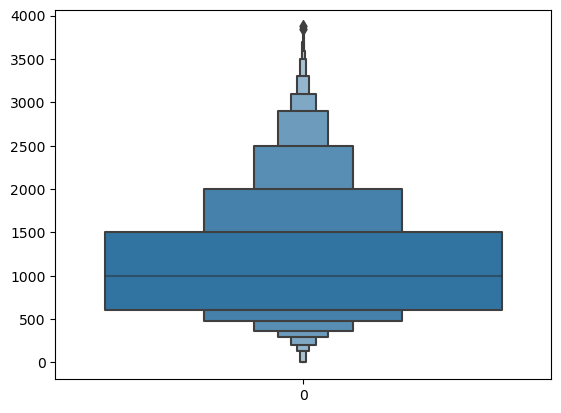

In [154]:
sns.boxenplot(ecom['retail_price'])

#### Necessary Transformations done Now we can use this Data for DATA ANALYSIS

## Exploratory Data Analysis

### Feature Extraction used to remove Month and Year from crawl_timestamp 

In [155]:
ecom['crawl_timestamp'] = pd.to_datetime(ecom['crawl_timestamp'])
ecom['crawl_timestamp']

C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\2795653050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['crawl_timestamp'] = pd.to_datetime(ecom['crawl_timestamp'])


0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
14994   2015-12-20 08:26:17+00:00
14995   2015-12-20 08:26:17+00:00
14996   2015-12-20 08:26:17+00:00
14997   2015-12-20 08:26:17+00:00
14998   2015-12-20 08:26:17+00:00
Name: crawl_timestamp, Length: 13053, dtype: datetime64[ns, UTC]

In [156]:
ecom['year'] = ecom['crawl_timestamp'].dt.year
ecom['month'] = ecom['crawl_timestamp'].dt.month
ecom.head()

C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\512139121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['year'] = ecom['crawl_timestamp'].dt.year
C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\512139121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['month'] = ecom['crawl_timestamp'].dt.month


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,year,month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23+00:00,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",2016,3


In [157]:
ecom[['year','month']].head()

,year,month
0,2016,3
1,2016,3
2,2016,3
3,2016,3
4,2016,3


## Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

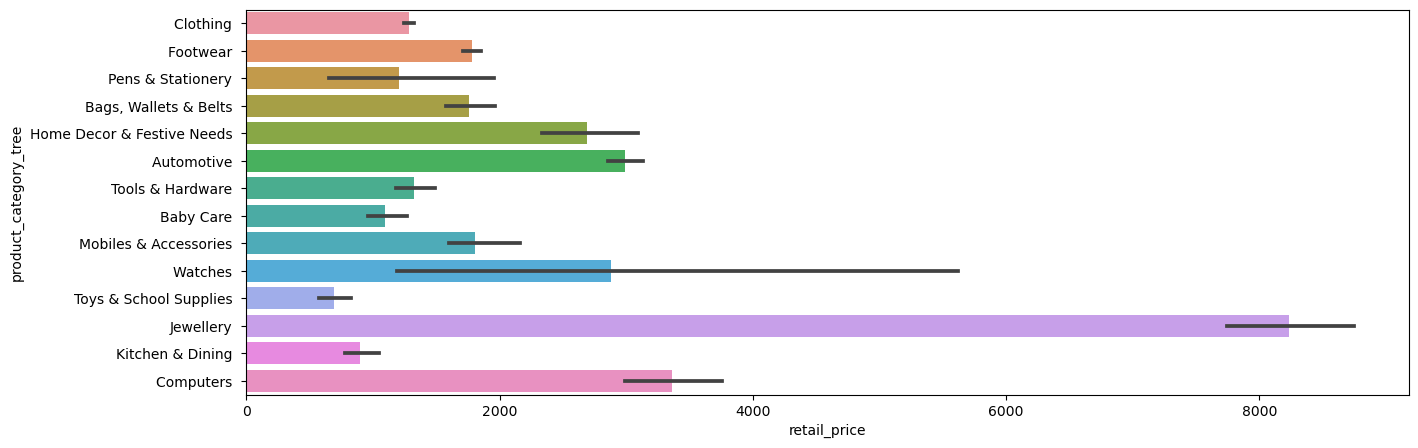

In [158]:
plt.figure(figsize=(15,5))
sns.barplot(data = ecom_data, x = 'retail_price', y = 'product_category_tree' )
plt.show

#### Jewellery has the Maximum selling price on the Ecommerce Website

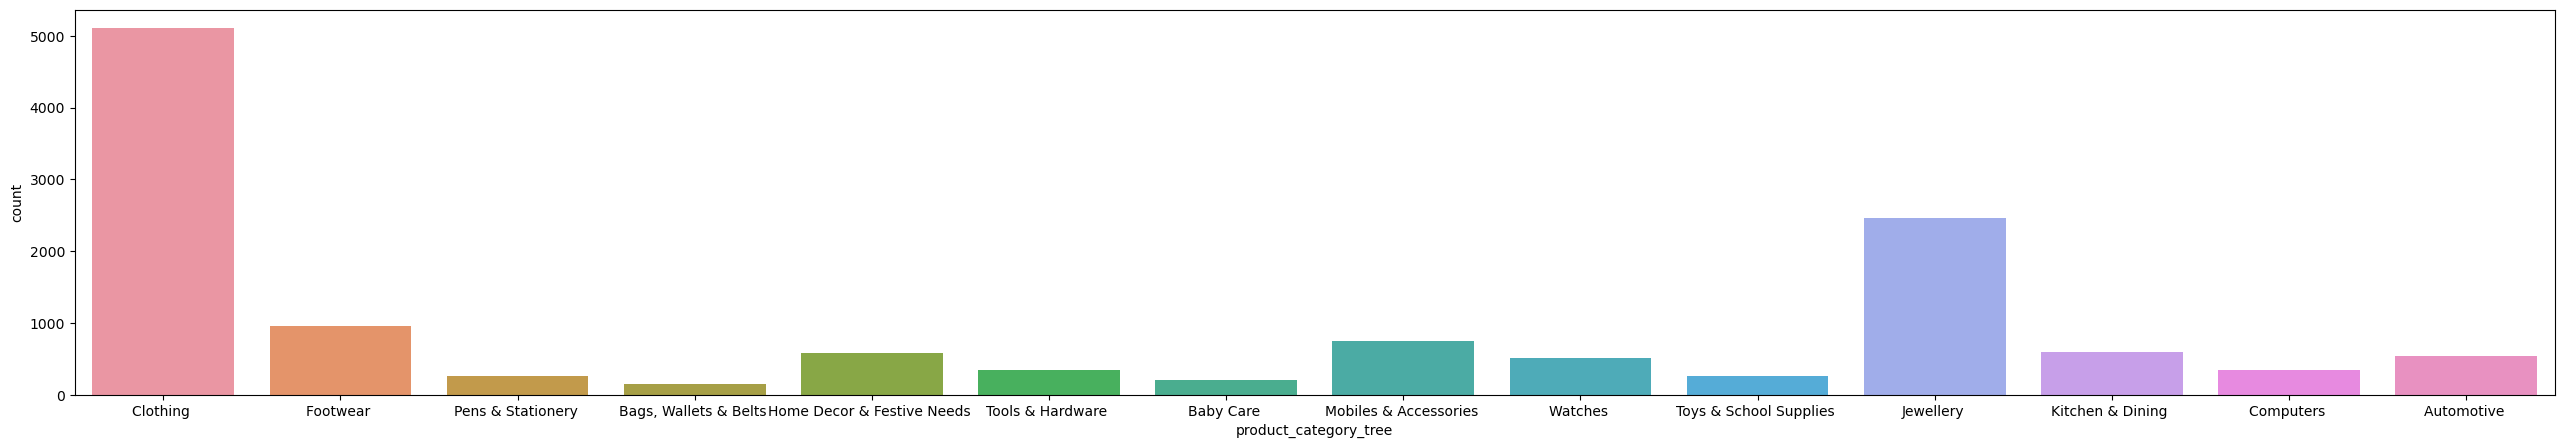

In [159]:
plt.figure(figsize=(32,5))
sns.countplot(data = ecom,x='product_category_tree')
plt.show()

#### Clothing has been the most selling product on Ecommerce Website
#### Bags,wallet & Belt has been the least selling product on Ecomerce Website

<function matplotlib.pyplot.show(close=None, block=None)>

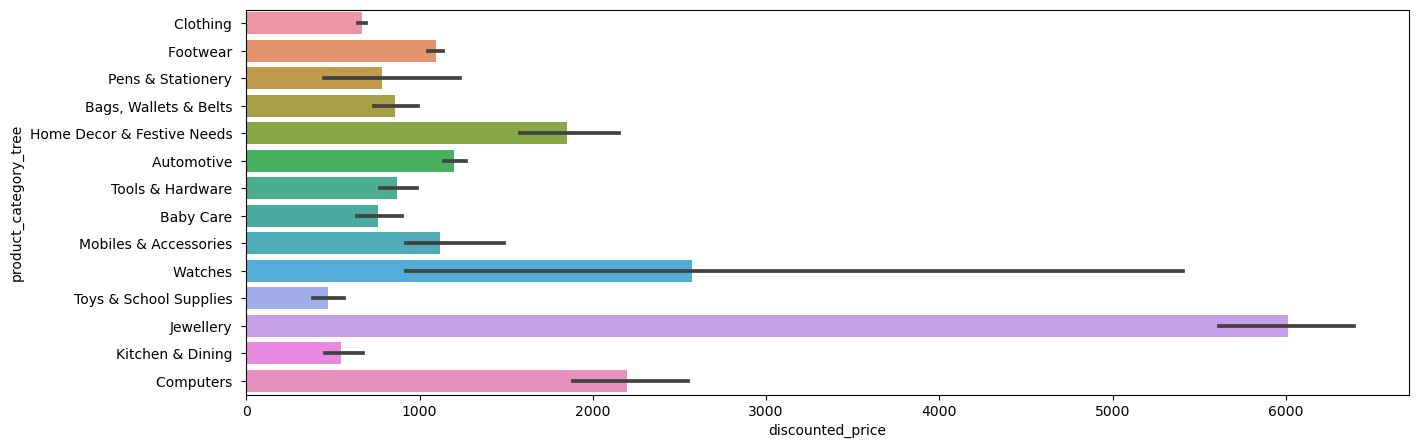

In [160]:
plt.figure(figsize=(15,5))
sns.barplot(data = ecom_data, x = 'discounted_price',y = 'product_category_tree' )
plt.show

#### Most discounted product was Jewellery

<function matplotlib.pyplot.show(close=None, block=None)>

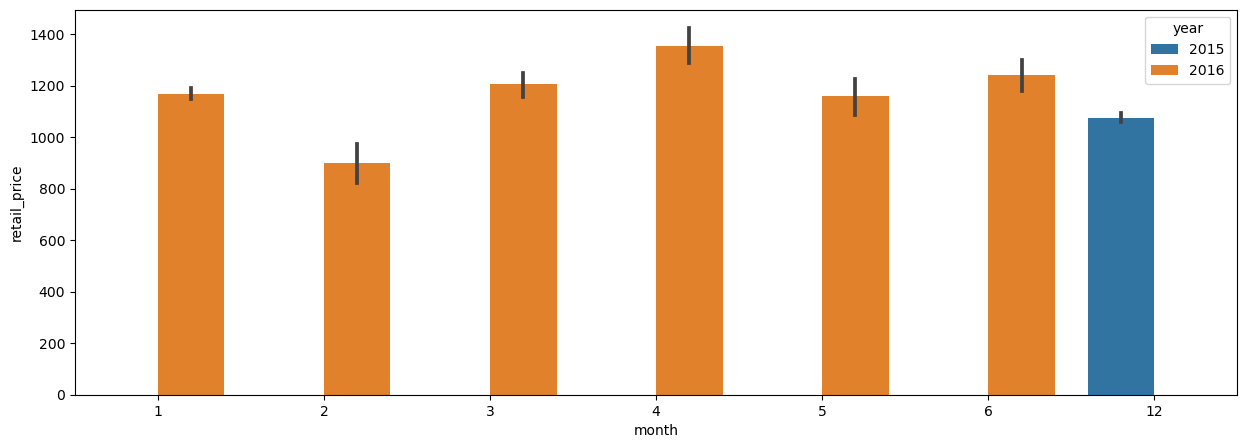

In [161]:
plt.figure(figsize=(15,5))
sns.barplot(data = ecom, x = 'month', y = 'retail_price',hue='year')
plt.show

### Feb 2016 was the least performing month which affected the overall sales in the year 2016

# Word Embedding (Encoding)

In [162]:
encode = ecom.select_dtypes(['object','datetime64[ns, UTC]','bool','float64']).columns
for i in encode:
    ecom[i]= ecom[i].astype('category')
    ecom[i]= ecom[i].cat.codes

C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1853558700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom[i]= ecom[i].astype('category')
C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1853558700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom[i]= ecom[i].cat.codes
C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1853558700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [163]:
ecom.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,year,month
0,10004,86,410,402,3,10016,375,252,4544,0,4787,35,35,103,7267,2016,3
1,12478,86,957,173,5,8510,375,355,4302,0,4700,35,35,41,5746,2016,3
2,470,86,407,402,3,10013,252,155,4522,0,4784,35,35,103,7238,2016,3
3,10560,86,412,402,3,10019,457,337,10693,0,4788,35,35,103,7290,2016,3
4,2118,86,2399,7680,5,8508,252,226,10485,0,6288,35,35,2007,7672,2016,3


In [164]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13053 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   uniq_id                  13053 non-null  int16
 1   crawl_timestamp          13053 non-null  int16
 2   product_url              13053 non-null  int16
 3   product_name             13053 non-null  int16
 4   product_category_tree    13053 non-null  int8 
 5   pid                      13053 non-null  int16
 6   retail_price             13053 non-null  int16
 7   discounted_price         13053 non-null  int16
 8   image                    13053 non-null  int16
 9   is_FK_Advantage_product  13053 non-null  int8 
 10  description              13053 non-null  int16
 11  product_rating           13053 non-null  int8 
 12  overall_rating           13053 non-null  int8 
 13  brand                    13053 non-null  int16
 14  product_specifications   13053 non-null  int16
 15  year   

##  Training Data

In [165]:
x_train = ecom.iloc[:,[3,6,8,10,13,14]].values
x_train

array([[  402,   375,  4544,  4787,   103,  7267],
       [  173,   375,  4302,  4700,    41,  5746],
       [  402,   252,  4522,  4784,   103,  7238],
       ...,
       [ 6646,   742,  1099, 10102,  1739,  3430],
       [ 3388,   180,   201,  4643,   935,  4494],
       [ 3388,   174,   244,  4641,   935,  4495]], dtype=int16)

In [167]:
y_train = ecom.iloc[:,4].values
y_train

array([3, 5, 3, ..., 9, 7, 7], dtype=int8)

In [168]:
from sklearn.linear_model import LinearRegression

# Fitting the Model
regressor_ini = LinearRegression().fit(x_train,y_train)

# Test Data Cleaning and removing the outlier and Testing the Data

In [169]:
ecom_test = pd.read_csv(r"C:\Upgrad\PYTHON week 6, 7 8\Test_Data.csv")
ecom_test.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,Jewellery,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [170]:
ecom_test.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64

In [171]:
ecom_test.fillna({'retail_price' : 0, 'discounted_price':0,
                  'brand': 'Not Mentioned',
                  'product_specifications':'Not Given'},inplace=True)

In [172]:
ecom_test.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

<Axes: >

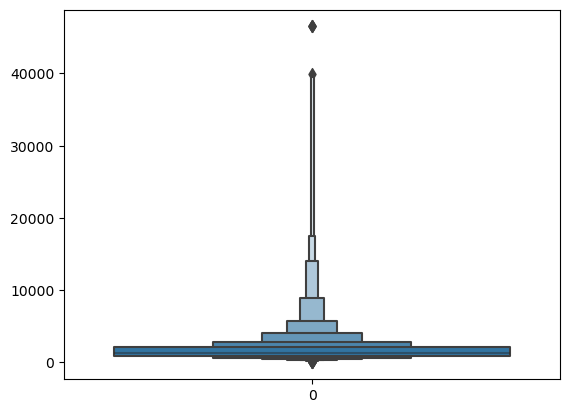

In [173]:
sns.boxenplot(ecom_test['retail_price'])

In [174]:
outlier_t=ecom_test.select_dtypes(exclude=['object','bool']).columns
Q1_t=ecom_test[outlier_t].quantile(0.25)
Q3_t=ecom_test[outlier_t].quantile(0.75)
IQR_t=Q3_t-Q1_t
lower_limit_t = Q1_t-1.5*IQR_t
upper_limit_t = Q3_t+1.5*IQR_t

ecom_t = ecom_test[~((ecom_test[outlier_t]<lower_limit_t) | (ecom_test[outlier_t]>upper_limit_t)).any(axis = 1)]
ecom_t.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,Jewellery,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,Jewellery,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."


<Axes: >

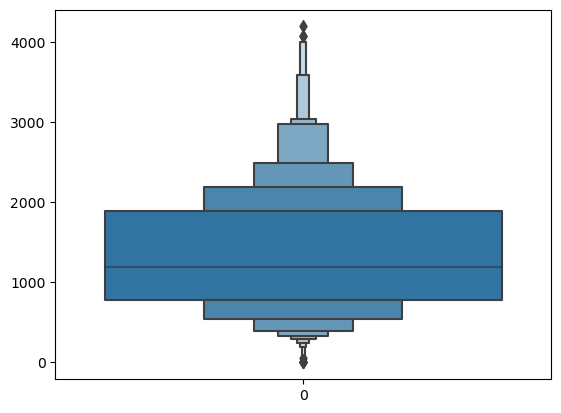

In [175]:
sns.boxenplot(ecom_t['retail_price'])

In [176]:
ecom_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 2533
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2258 non-null   object 
 1   crawl_timestamp          2258 non-null   object 
 2   product_url              2258 non-null   object 
 3   product_name             2258 non-null   object 
 4   product_category_tree    2258 non-null   object 
 5   pid                      2258 non-null   object 
 6   retail_price             2258 non-null   float64
 7   discounted_price         2258 non-null   float64
 8   image                    2258 non-null   object 
 9   is_FK_Advantage_product  2258 non-null   bool   
 10  description              2258 non-null   object 
 11  product_rating           2258 non-null   object 
 12  overall_rating           2258 non-null   object 
 13  brand                    2258 non-null   object 
 14  product_specifications   2258

In [177]:
encode_t = ecom_t.select_dtypes(['object','bool','float64']).columns
for i in encode_t:
    ecom_t[i]= ecom_t[i].astype('category')
    ecom_t[i]= ecom_t[i].cat.codes

C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1677170965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_t[i]= ecom_t[i].astype('category')
C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1677170965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_t[i]= ecom_t[i].cat.codes
C:\Users\Tejas Karekar\AppData\Local\Temp\ipykernel_12024\1677170965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [178]:
ecom_t.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,720,5,2010,1154,7,372,43,113,1165,0,1772,22,22,595,674
1,713,5,842,554,7,509,178,353,1188,0,460,22,22,304,1785


In [179]:
ecom_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 2533
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   uniq_id                  2258 non-null   int16
 1   crawl_timestamp          2258 non-null   int8 
 2   product_url              2258 non-null   int16
 3   product_name             2258 non-null   int16
 4   product_category_tree    2258 non-null   int8 
 5   pid                      2258 non-null   int16
 6   retail_price             2258 non-null   int16
 7   discounted_price         2258 non-null   int16
 8   image                    2258 non-null   int16
 9   is_FK_Advantage_product  2258 non-null   int8 
 10  description              2258 non-null   int16
 11  product_rating           2258 non-null   int8 
 12  overall_rating           2258 non-null   int8 
 13  brand                    2258 non-null   int16
 14  product_specifications   2258 non-null   int16
dtypes: int16(

In [180]:
x_test = ecom_t.iloc[:,[3,6,8,10,13,14]].values
x_test

array([[1154,   43, 1165, 1772,  595,  674],
       [ 554,  178, 1188,  460,  304, 1785],
       [1103,  297,  287, 1757,  565,  621],
       ...,
       [ 310,  192,  911,   83,  174, 1344],
       [ 310,  223,  904,   79,  174, 1341],
       [ 310,  223, 2054,   83,  174, 1371]], dtype=int16)

In [181]:
y_test = ecom_t.iloc[:,4].values
y_test

array([7, 7, 9, ..., 1, 1, 1], dtype=int8)

In [182]:
# Testing the Model
y_predict = regressor_ini.predict(x_test)

In [183]:
# Checking the accuracy score
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

-0.2688896604040143

### Linear Model was selected to predict the data but it was a Categorical Data. so, The prediction score was in negative which gave us the indication that non of the Regression models would work on this data and we should move towards Classification models so we can achive the prediction score.

# Classification Model (KNN)

In [184]:
x_train_knn = ecom.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14]].values
x_train_knn

array([[10004,    86,   410, ...,    35,   103,  7267],
       [12478,    86,   957, ...,    35,    41,  5746],
       [  470,    86,   407, ...,    35,   103,  7238],
       ...,
       [ 9288,    11, 11178, ...,    35,  1739,  3430],
       [  966,    11,  5762, ...,    35,   935,  4494],
       [10995,    11,  5763, ...,    35,   935,  4495]], dtype=int16)

In [185]:
y_train_knn = ecom.iloc[:,4].values
y_train_knn

array([3, 5, 3, ..., 9, 7, 7], dtype=int8)

### Creating a Model on Training dataset

In [186]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_ini = KNeighborsClassifier().fit(x_train_knn,y_train_knn)

### Running the Model on Test Dataset

In [187]:
x_test_knn = ecom_t.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14]].values
x_test_knn

array([[ 720,    5, 2010, ...,   22,  595,  674],
       [ 713,    5,  842, ...,   22,  304, 1785],
       [2107,    5, 1906, ...,   22,  565,  621],
       ...,
       [1310,    0,  452, ...,   22,  174, 1344],
       [ 941,    0,  466, ...,   22,  174, 1341],
       [1793,    0,  456, ...,   22,  174, 1371]], dtype=int16)

In [188]:
y_test_knn = ecom_t.iloc[:,4].values
y_test_knn

array([7, 7, 9, ..., 1, 1, 1], dtype=int8)

In [189]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [190]:
#Running the model on the test dataset
y_pred_knn = knnmodel_ini.predict(x_test_knn)

#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test_knn,y_pred_knn)

0.20239149689991143

### KNN Model Struggled to predict the data this can be due to data Imbalance. As compared to training dataset test dataset was just 15%. This could be major reason for low accuarcy score